In [10]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np

n = 3
circuit = QuantumCircuit(n+1, n)

# Initialize the target qubit in the |1> state (eigenstate of U)
circuit.x(n)

circuit.h(range(n))

theta = 1/3  # Example phase
U = QuantumCircuit(1)
U.rz(2 * np.pi * theta, 0)
U = U.to_gate()
U.name = "U"

for i in range(n):
    circuit.append(U.control(1), [i, n])
circuit.append(QFT(n, inverse=True).to_gate(), range(n))

circuit.measure(range(n), range(n))
circuit.draw()


CircuitError: 'Index 4 out of range for size 4.'

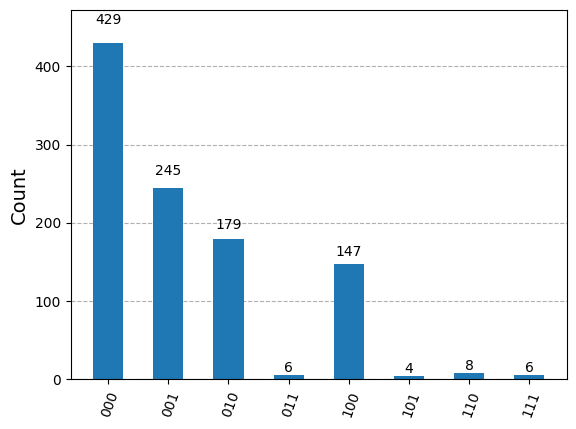

In [9]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()

compiled_circuit = transpile(circuit, simulator)

res = simulator.run(compiled_circuit).result()
counts = res.get_counts()

plot_histogram(counts)